Your Name: Kieran Fitzmaurice 

(Adapted from textbook exercise 8.15)

A double pendulum consists of a normal pendulum with another pendulum hanging from its end. For simplicity let us ignore friction, and assume that both pendulums have bobs of the same mass $m$ and massless arms of the same length $\ell$. Thus the setup looks like this:

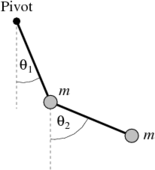

The position of the arms at any moment in time is uniquely specified by the two angles $\theta_1$ and $\theta_2$.  The equations of motion for the angles are most easily derived using the Lagrangian formalism, as follows.
The heights of the two bobs, measured from the level of the pivot are
$$h_1 = -\ell\cos\theta_1, \qquad h_2 = -\ell(\cos\theta_1+\cos\theta_2)\,,$$
so the potential energy of the system is
$$V = mgh_1 + mgh_2 = -mg\ell(2\cos\theta_1 + \cos\theta_2)\,,$$
where $g$ is the acceleration due to gravity. (The potential energy is negative because we have chosen to measure it downwards from the level of the pivot.) The velocities of the two bobs are given by
$$v_1 = \ell\dot\theta_1, \qquad v_2^2 = \ell^2 \bigl[ \dot\theta_1^2 + \dot\theta_2^2 + 2 \dot\theta_1\dot\theta_2 \cos(\theta_1-\theta_2) \bigr]\,$$
where $\dot\theta$ means the derivative of $\theta$ with respect to time $t$. (If you don't see where the second velocity equation comes from, it's a good exercise to derive it for yourself from the geometry of the
pendulum.) Now the total kinetic energy is
$$T = \tfrac12 m v_1^2 + \tfrac12 m v_2^2 = m\ell^2 \bigl[ \dot\theta_1^2 + \tfrac12 \dot\theta_2^2 + \dot\theta_1\dot\theta_2 \cos(\theta_1-\theta_2) \bigr]\,,$$
and the Lagrangian of the system is
$$\mathcal{L} = T - V = m\ell^2 \bigl[ \dot\theta_1^2 + \tfrac12 \dot\theta_2^2 + \dot\theta_1\dot\theta_2 \cos(\theta_1-\theta_2) \bigr] + mg\ell(2\cos\theta_1 + \cos\theta_2)\,.$$
Then the equations of motion are given by the Euler--Lagrange equations
$${d\over dt} \biggl({\partial\mathcal{L}\over\partial\dot\theta_1} \biggr) = {\partial\mathcal{L}\over\partial\theta_1}, \qquad {d\over dt} \biggl({\partial\mathcal{L}\over\partial\dot\theta_2} \biggr) = {\partial\mathcal{L}\over\partial\theta_2}\,,$$
which in this case give
$$\begin{align}
2\ddot\theta_1 + \ddot\theta_2 \cos(\theta_1-\theta_2) &+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\ddot\theta_2 + \ddot\theta_1 \cos(\theta_1-\theta_2) &- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,,
\end{align}$$
where the mass $m$ has canceled out.

These are second-order equations, but we can convert them into first-order ones by the usual method, defining two new variables, $\omega_1$ and $\omega_2$, thus:
$$\dot\theta_1 = \omega_1,\qquad \dot\theta_2 = \omega_2\,.$$
In terms of these variables our equations of motion become
$$\begin{align}
2\dot\omega_1 + \dot\omega_2 \cos(\theta_1-\theta_2) &+ \omega_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\dot\omega_2 + \dot\omega_1 \cos(\theta_1-\theta_2) &- \omega_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$
Finally we have to rearrange these into the standard form with a single derivative on the left-hand side of each one, which gives

$$\begin{align*}
\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2) + 2\omega_2^2\sin(\theta_1-\theta_2) + (g/\ell) \bigl[ \sin(\theta_1-2\theta_2) + 3 \sin\theta_1 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}, \\ \\
\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2) + \omega_2^2\sin(2\theta_1-2\theta_2) + 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2) - \sin\theta_2 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}$$

(This last step is quite tricky and involves some trigonometric identities. If you're not certain of how the calculation goes you may find it useful to go through the derivation for yourself.)

These two equations, along with the equations $\dot{\theta}_1=\omega_1$ and $\dot{\theta}_2=\omega_2$, give us four first-order equations which between them define the motion of the double pendulum.

- Write a program using the fourth-order Runge-Kutta method to solve the equations of motion for the case where $\ell=40\,$cm, with the initial conditions $\theta_1=\theta_2=90^\circ$ and $\omega_1=\omega_2=0$. Make a graph of $\theta_1(t)$ and $\theta_2(t)$ from $t=0$ to $t=100$ seconds.

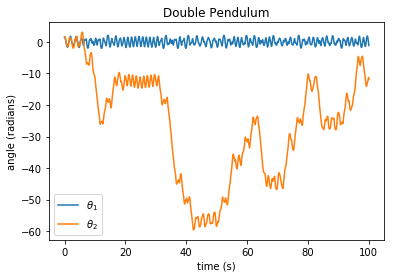

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    th1,th2,w1,w2 = r
    fth1 = w1
    fth2 = w2
    fw1 = -1*(w1**2*np.sin(2*th1-2*th2) + 2*w2**2*np.sin(th1 - th2) + (g/l)*(np.sin(th1-2*th2) + 3*np.sin(th1)))/(3 - np.cos(2*th1 - 2*th2))
    fw2 = (4*w1**2*np.sin(th1-th2) + w2**2*np.sin(2*th1 - 2*th2) + 2*(g/l)*(np.sin(2*th1 - th2) - np.sin(th2)))/(3 - np.cos(2*th1 - 2*th2))  
    return np.array([fth1,fth2,fw1,fw2])

#Initial Conditions
g = 9.81
l = 0.4
th1 = np.pi/2
th2 = np.pi/2
w1 = 0
w2 = 0

h = 0.001
t_values = np.arange(0,100,h)

th1_values = []
th2_values = []
w1_values = []
w2_values = []

for t in t_values:
    th1_values.append(th1)
    th2_values.append(th2)
    w1_values.append(w1)
    w2_values.append(w2)
    r = (th1,th2,w1,w2)
    th1,th2,w1,w2 = RK4_step(f,r,t,h)
    
plt.plot(t_values,th1_values,label = "$\\theta_1$")
plt.plot(t_values,th2_values,label = "$\\theta_2$")
plt.xlabel("time (s)")
plt.ylabel("angle (radians)")
plt.title("Double Pendulum")
plt.legend()
plt.show()

- Derive an expression for the total energy $E = T + V$ of the system in terms of the variables $\theta_1$, $\theta_2$, $\omega_1$, and $\omega_2$, plus the constants $g$, $\ell$, and $m$. Calculate the total energy of the system assuming that the mass of the bobs is $1\,$kg each, and make a graph of energy as a function of time from $t=0$ to $t=100$ seconds.

> Because of energy conservation, the total energy should be constant over time (actually it should be zero for this particular set of initial conditions), but you will find that it is not perfectly constant because of the approximate nature of the solution of the differential equation. Choose a suitable value of the step size $h$ to ensure that the variation in energy is less than $10^{-5}$ Joules over the course of the calculation. Make sure you plots of $\theta_1(t)$ and $\theta_2(t)$ are using this value of $h$.

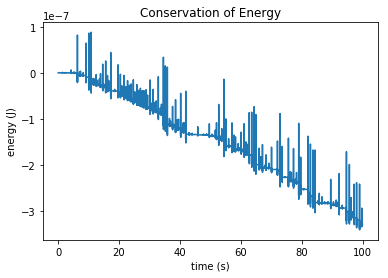

In [2]:
th1_values = np.array(th1_values)
th2_values = np.array(th2_values)
w1_values = np.array(w1_values)
w2_values = np.array(w2_values)

m = 1

T = m*l**2*(w1_values**2 + 0.5*w2_values**2 + w1_values*w2_values*np.cos(th1_values - th2_values))
V = -m*g*l*(2*np.cos(th1_values) + np.cos(th2_values))

E = T + V

plt.plot(t_values,E)
plt.xlabel("time (s)")
plt.ylabel("energy (J)")
plt.title("Conservation of Energy")
plt.show()

- Make an animation of the motion of the double pendulum over time.

> You will probably also find that the value of $h$ needed to get the required accuracy in your solution gives a frame-rate much faster than any that can reasonably be displayed in your animation, so you won't be able to display every time-step of the calculation in the animation. Instead you will have to arrange the program so that it updates the animation only once every several Runge-Kutta steps.

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def get_coords(th1,th2,l):
    x0 = 0 # pivot 
    y0 = 0
    x1 = l*np.sin(th1) # first mass
    y1 = -l*np.cos(th1)
    x2 = x1 + l*np.sin(th2) # second mass
    y2 = y1 + -l*np.cos(th2)
    return(np.array([x0,x1,x2]),np.array([y0,y1,y2]))

def animate(frame):
    ax.clear()
    index = frame*ind_per_fr
    th1 = th1_values[index] 
    th2 = th2_values[index]
    x,y = get_coords(th1,th2,l)
    ax.plot(x,y,'b-')
    ax.plot(x,y,'bo')
    ax.axis(xmin = -2*l, xmax = 2*l, ymin = -2*l, ymax = 2*l)
    #plt.show()

plt.close("all")

numframe = 3000
ind_per_fr = t_values.shape[0]//numframe
numframe = t_values.shape[0]//ind_per_fr
delay_in_ms = numframe/30
           
fig,ax = plt.subplots(figsize = (8,8))
plt.axis(xmin = -2*l, xmax = 2*l, ymin = -2*l, ymax = 2*l)

anim = FuncAnimation(fig, animate, frames = numframe//2, interval = delay_in_ms)
HTML(anim.to_html5_video())